# Effect of different $\tilde \theta$ distribution

Although in theory, we often set the initialization of $\theta$ as an $m$ independent distribution, the practical setting often consider the influence of $m$. 
In particular, a variance of $O(1/m)$ is widely used by practitioners. 
We have to mention that this will also change the dynamics of NN parameters.

Remark: If we use ReLU activation function, the scaling of $\theta$ and $u$ is shared. Thus, the interaction between them becomes more complex and the scaling of $\theta$ is not negligible.

In [1]:
import torch
from torch import optim, nn
from torchvision import datasets, transforms
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
import copy
import os
import random
from models import train_ntk, train_ntk_theta
os.environ["CUDA_VISIBLE_DEVICES"] = "2"

# training parameters
batch_size = 128

transform = transforms.Compose([
        transforms.ToTensor()
])
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('data', train=True, download=True, transform=transform),
    batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('data', train=False, download=True, transform=transform),
    batch_size=batch_size, shuffle=True)

In [2]:
h_dim = 5000
train_epoch = 100
alpha_set = [h_dim**(0.1*k) for k in range(11)]
alpha = alpha_set[5]



In [3]:
srr2,saa2,sll2 = train_ntk(train_loader, test_loader,h_dim,alpha,train_epoch,.1)

R2,A2,L2 = train_ntk_theta(train_loader, test_loader,h_dim,alpha,train_epoch,.1)

epoch 0 loss (train,test):2.37e-01;3.13e-01 acc:0.921700
dtheta: 0.0061092484
du: 5.211085345598332
epoch 1 loss (train,test):1.25e-01;1.88e-01 acc:0.948100
dtheta: 0.0079834
du: 6.125493887849774
epoch 2 loss (train,test):5.54e-02;1.44e-01 acc:0.962200
dtheta: 0.009491652
du: 6.738185785666278
epoch 3 loss (train,test):2.61e-02;1.20e-01 acc:0.965500
dtheta: 0.010779925
du: 7.200610470815681
epoch 4 loss (train,test):1.72e-02;1.11e-01 acc:0.967000
dtheta: 0.011849069
du: 7.557356674844473
epoch 5 loss (train,test):1.42e-02;1.09e-01 acc:0.966800
dtheta: 0.012749645
du: 7.8461247537456495
epoch 6 loss (train,test):1.13e-02;1.13e-01 acc:0.967700
dtheta: 0.013475193
du: 8.077630543753108
epoch 7 loss (train,test):9.66e-03;1.08e-01 acc:0.968100
dtheta: 0.014087759
du: 8.27391579296683
epoch 8 loss (train,test):7.68e-03;1.07e-01 acc:0.969300
dtheta: 0.014639046
du: 8.446172070173281
epoch 9 loss (train,test):6.34e-03;1.06e-01 acc:0.969800
dtheta: 0.015118188
du: 8.597626243461571
epoch 10 lo

epoch 82 loss (train,test):1.17e-03;1.20e-01 acc:0.970500
dtheta: 0.027118653
du: 11.916890761224904
epoch 83 loss (train,test):9.50e-04;1.21e-01 acc:0.970000
dtheta: 0.027202524
du: 11.937327768067835
epoch 84 loss (train,test):1.03e-03;1.23e-01 acc:0.970200
dtheta: 0.027285669
du: 11.957566684722767
epoch 85 loss (train,test):8.84e-04;1.20e-01 acc:0.970400
dtheta: 0.027367773
du: 11.977497929383569
epoch 86 loss (train,test):1.02e-03;1.21e-01 acc:0.970100
dtheta: 0.027449299
du: 11.997235298541222
epoch 87 loss (train,test):1.10e-03;1.20e-01 acc:0.970100
dtheta: 0.027530083
du: 12.016783006880575
epoch 88 loss (train,test):9.40e-04;1.22e-01 acc:0.970000
dtheta: 0.027609855
du: 12.036132625031925
epoch 89 loss (train,test):8.38e-04;1.20e-01 acc:0.970100
dtheta: 0.027688952
du: 12.055196698284615
epoch 90 loss (train,test):8.72e-04;1.20e-01 acc:0.970100
dtheta: 0.027767517
du: 12.074136438334198
epoch 91 loss (train,test):8.64e-04;1.21e-01 acc:0.969900
dtheta: 0.027845163
du: 12.092810

epoch 65 loss (train,test):1.28e-02;6.89e-02 acc:0.979500
dtheta: 0.15742108
du: 11.218627063205517
epoch 66 loss (train,test):1.53e-02;7.16e-02 acc:0.978200
dtheta: 0.15815249
du: 11.269870255296276
epoch 67 loss (train,test):1.42e-02;8.16e-02 acc:0.978800
dtheta: 0.15886045
du: 11.321376865190228
epoch 68 loss (train,test):1.81e-02;7.11e-02 acc:0.978800
dtheta: 0.1595677
du: 11.371734973462255
epoch 69 loss (train,test):1.16e-02;6.96e-02 acc:0.978900
dtheta: 0.16023256
du: 11.418975268615691
epoch 70 loss (train,test):1.46e-02;7.35e-02 acc:0.979600
dtheta: 0.16090249
du: 11.4673682800759
epoch 71 loss (train,test):1.02e-02;6.90e-02 acc:0.979300
dtheta: 0.16156328
du: 11.513754047875777
epoch 72 loss (train,test):8.25e-03;6.91e-02 acc:0.979300
dtheta: 0.1622094
du: 11.559910115351268
epoch 73 loss (train,test):1.58e-02;7.20e-02 acc:0.979200
dtheta: 0.16283832
du: 11.606011391923698
epoch 74 loss (train,test):1.17e-02;6.96e-02 acc:0.979100
dtheta: 0.16344431
du: 11.648246748816465
epoc

## Distance between $\tilde\theta$ and $\theta$

According to the figures, when using smaller scaling of $\tilde\theta$, $\theta$ will move more than original setting. This will contribute to breaking the NTK regime.

Text(0.5, 0, 'epoch')

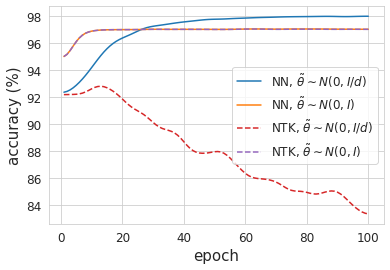

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

from scipy.ndimage.filters import gaussian_filter1d


plt.plot(np.arange(train_epoch)+1,100*gaussian_filter1d(np.array(A2)[:,0],3),label = r'NN, $\tilde{\theta}\sim N(0,I/d)$')
plt.plot(np.arange(train_epoch)+1,100*gaussian_filter1d(np.array(saa2)[:,0],3),label = r'NN, $\tilde{\theta}\sim N(0,I)$')
plt.plot(np.arange(train_epoch)+1,100*gaussian_filter1d(np.array(A2)[:,1],3),color ='tab:red',linestyle='dashed',label = r'NTK, $\tilde{\theta}\sim N(0,I/d)$')
plt.plot(np.arange(train_epoch)+1,100*gaussian_filter1d(np.array(saa2)[:,1],3),color ='tab:purple',linestyle='dashed',label = r'NTK, $\tilde{\theta}\sim N(0,I)$')


#plt.plot(np.arange(50)+1,np.array(srr4)[:,0],label = r'$\alpha = m^{0.7}$')

plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel(r'accuracy (%)',fontsize=15)
plt.xlabel('epoch',fontsize=15)



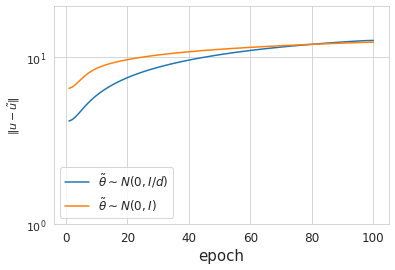

In [8]:
plt.plot(np.arange(train_epoch)+1,gaussian_filter1d(np.array(R2)[:,1],3),label = r'$\tilde{\theta}\sim N(0,I/d)$')

plt.plot(np.arange(train_epoch)+1,gaussian_filter1d(np.array(srr2)[:,1],3),label = r'$\tilde{\theta}\sim N(0,I)$')


#plt.plot(np.arange(50)+1,np.array(srr4)[:,0],label = r'$\alpha = m^{0.7}$')

plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=11)

plt.ylabel(r'${\Vert u-\tilde{u}\Vert}$',fontsize=11)
plt.xlabel('epoch',fontsize=15)
plt.ylim([1e0,20])
plt.yscale('log')

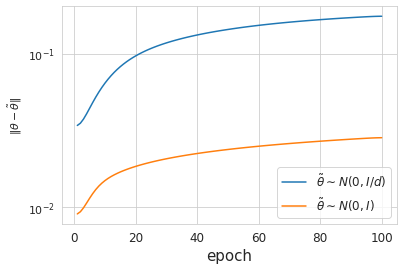

In [9]:

plt.plot(np.arange(train_epoch)+1,gaussian_filter1d(np.array(R2)[:,0],3),label = r'$\tilde{\theta}\sim N(0,I/d)$')

plt.plot(np.arange(train_epoch)+1,gaussian_filter1d(np.array(srr2)[:,0],3),label = r'$\tilde{\theta}\sim N(0,I)$')


#plt.plot(np.arange(50)+1,np.array(srr4)[:,0],label = r'$\alpha = m^{0.7}$')


plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=11)

plt.ylabel(r'${\Vert \theta-\tilde{\theta} \Vert}$',fontsize=11)
plt.xlabel('epoch',fontsize=15)
#plt.ylim([1e-7,10])
plt.yscale('log')